In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [2]:
from hopkins import *
from metric import *
from visual_assessment_of_tendency import *

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
iris = datasets.load_iris()
cluster1 = scale(iris.data)
cluster2 = scale(np.random.rand(150, 4))

In [6]:
def plot_cluster_inertia(cluster, max_range=8):
  inertia = []
  clusters_range = range(1, max_range)
  for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init="auto")
    kmeans.fit(cluster)
    inertia.append(kmeans.inertia_)

  plt.plot(clusters_range, inertia)
  plt.title("Elbow")
  plt.show()

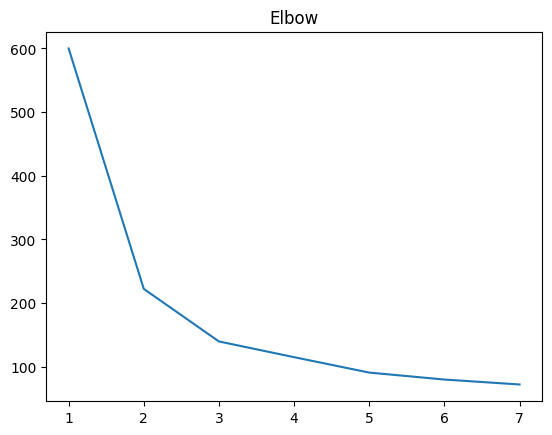

In [7]:
plot_cluster_inertia(cluster1)

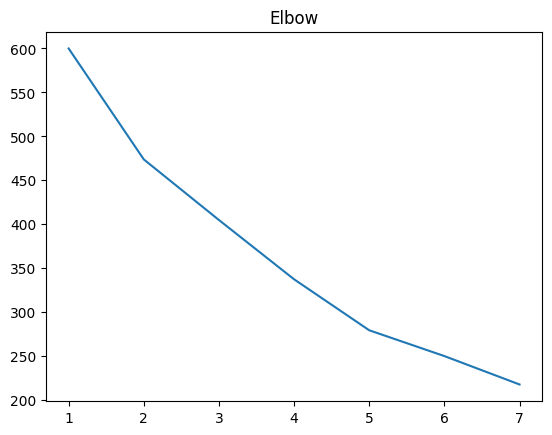

In [8]:
plot_cluster_inertia(cluster2)

In [9]:
hopkins(cluster1, 150)

0.1766665921914683

In [10]:
hopkins(cluster2, 150)

0.4846813965751582

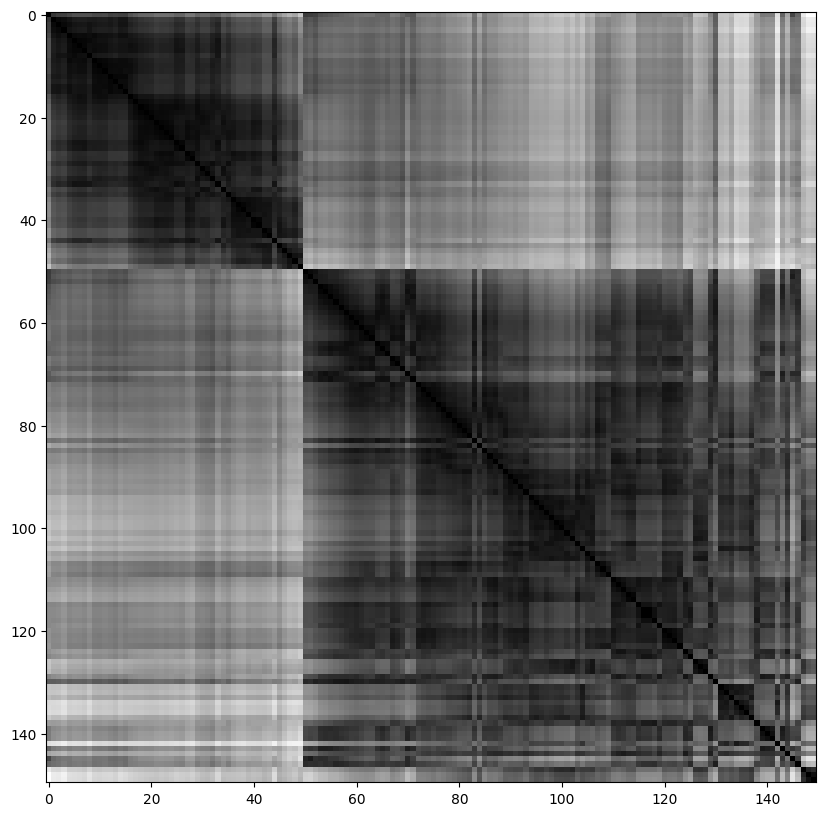

In [11]:
vat(cluster1)

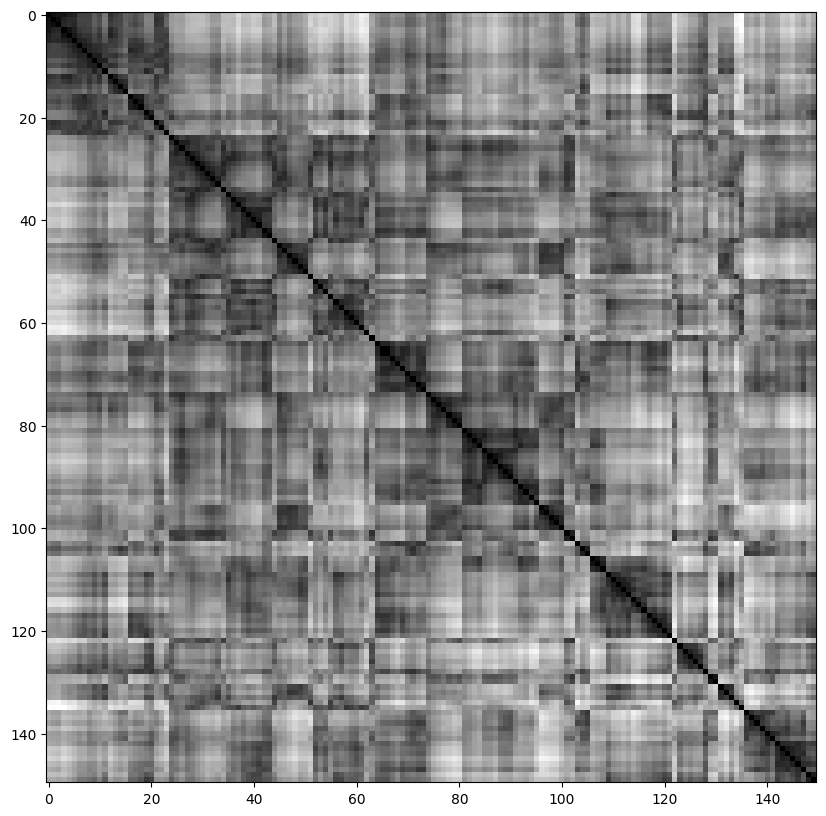

In [12]:
vat(cluster2)

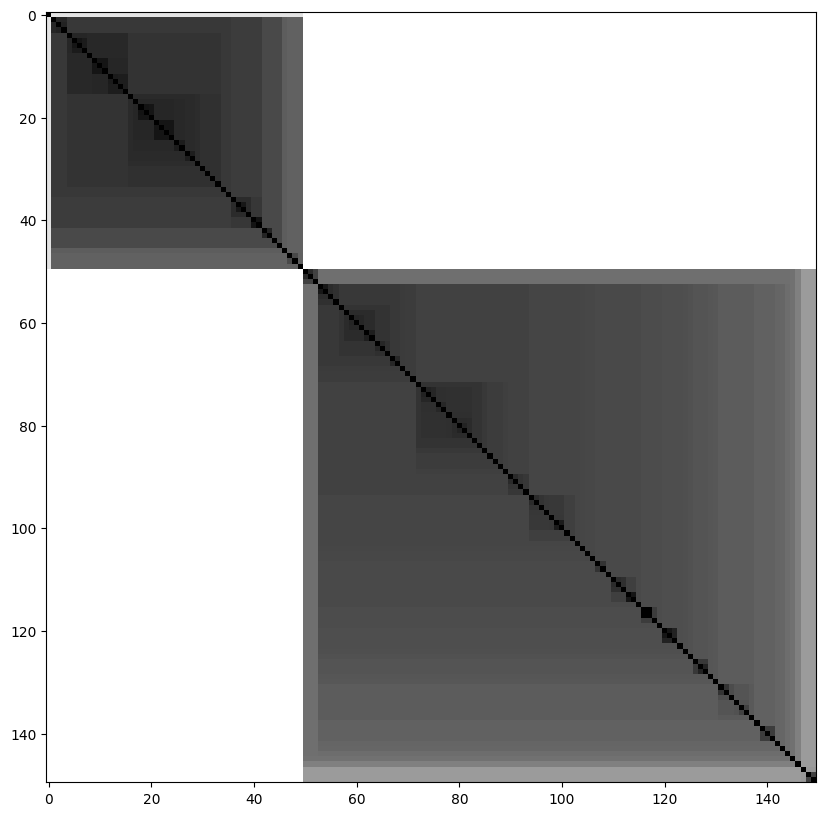

In [13]:
ivat(cluster1)

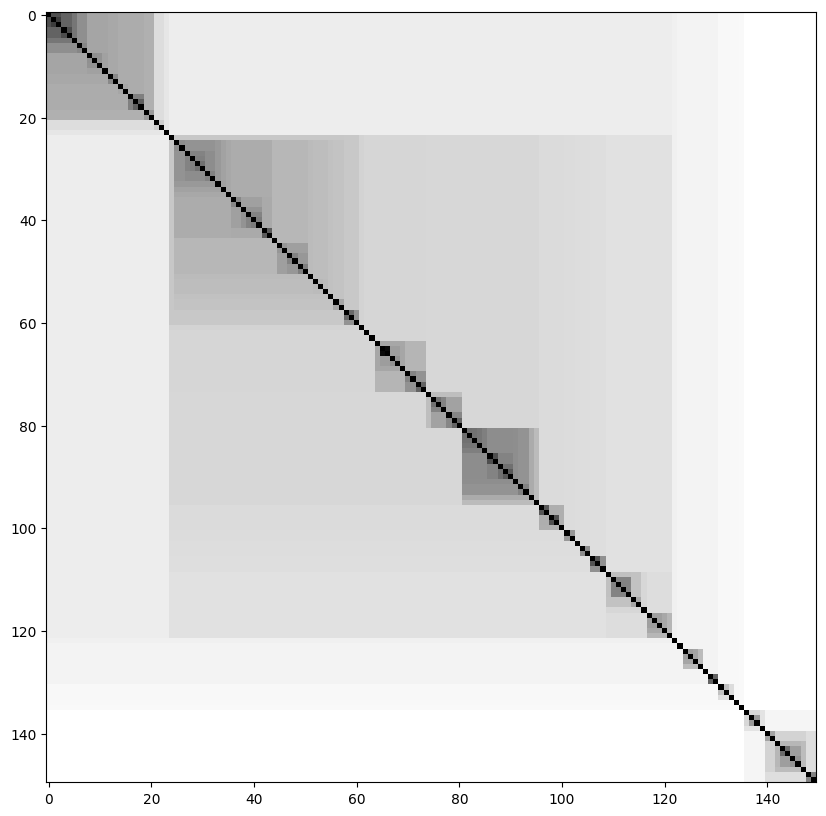

In [14]:
ivat(cluster2)

# Visualization and definition of metrics that defines the best quantity of clusters

In [21]:
s = assess_tendency_by_metric(cluster1, metric="silhouette", n_cluster=5)
d = assess_tendency_by_metric(cluster1, metric="davies_bouldin", n_cluster=5)
c = assess_tendency_by_metric(cluster1, metric="calinski_harabasz", n_cluster=5)

print(f"silhouette = {s}\ndavies_bouldin = {d}\ncalinski_harabasz = {c}")

silhouette = (2, array([0.58175005, 0.45994824, 0.38193194, 0.34590128]))
davies_bouldin = (2, array([0.59331269, 0.83400015, 0.86981437, 0.95304635]))
calinski_harabasz = (2, array([251.34933946, 241.9044017 , 207.25483719, 203.1599854 ]))


In [23]:
s = assess_tendency_by_metric(cluster2, metric="silhouette", n_cluster=5)
d = assess_tendency_by_metric(cluster2, metric="davies_bouldin", n_cluster=5)
c = assess_tendency_by_metric(cluster2, metric="calinski_harabasz", n_cluster=5)

print(f"silhouette = {s}\ndavies_bouldin = {d}\ncalinski_harabasz = {c}")

silhouette = (5, array([0.20915892, 0.21799463, 0.23060828, 0.24071529]))
davies_bouldin = (5, array([1.84063854, 1.51616592, 1.37046091, 1.2363048 ]))
calinski_harabasz = (5, array([38.39248149, 41.51677737, 41.24328313, 42.26793082]))


## Getting the average of the 3 previous seen metrics simplified

In [18]:
m = assess_tendency_by_mean_metric_score(cluster1, n_cluster=5)
print(m)

2.0


In [19]:
m = assess_tendency_by_mean_metric_score(cluster2, n_cluster=5)
print(m)

5.0
